c:\Users\khaib\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\saving\saving_lib.py:415: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 4 variables whereas the saved optimizer has 6 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Prediction: [[1.5928397e-05 9.6806290e-04 9.5628612e-02 2.2719786e-04 2.3776051e-02
  8.7889224e-01 4.9192936e-04]]


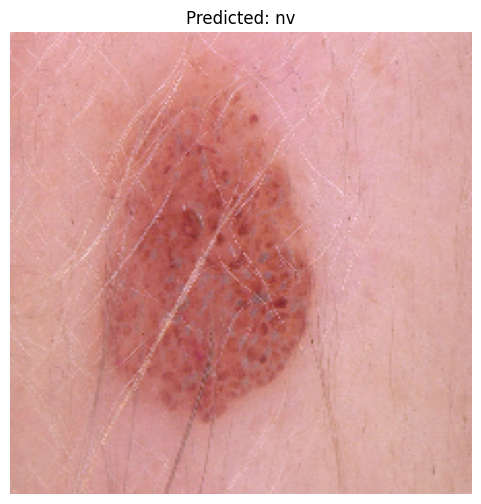

In [7]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.models import load_model


model_load = load_model('/SkinClassii/modelnew.keras')
#model_load.summary()

image_path = '/SkinClassii/train_folder/test/nv'
# Example of making a prediction with the loaded 
img_width, img_height = 224, 224
img = tf.keras.preprocessing.image.load_img(image_path, target_size=(img_width, img_height))
img = tf.keras.preprocessing.image.img_to_array(img)
img = np.expand_dims(img, axis=0)

prediction = model_load.predict(img)
print("Prediction:", prediction)


# Hiển thị ảnh
plt.figure(figsize=(6, 6))
plt.imshow(img[0] / 255.0)  # Chuẩn hóa và hiển thị ảnh
plt.axis('off')

# Xây dựng nhãn cho kết quả dự đoán
labels = ['akiec', 'bcc', 'bkl', 'df', 'mel', 'nv', 'vasc']
predicted_class = labels[np.argmax(prediction)]

# Hiển thị kết quả dự đoán
plt.title(f'Predicted: {predicted_class}')
plt.show()

In [18]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os

# Load mô hình đã được huấn luyện
model_load = tf.keras.models.load_model('/SkinClassii/model_tf.keras')

# Đường dẫn tới thư mục chứa dữ liệu kiểm tra
test_dir = "/SkinClassii/train_folder/test/"

# Danh sách các nhãn lớp
labels = ['akiec', 'bcc', 'bkl', 'df', 'mel', 'nv', 'vasc']

# Hàm để dự đoán và đánh giá từng ảnh
def predict_and_evaluate(image_path):
    # Load ảnh từ đường dẫn
    img = tf.keras.preprocessing.image.load_img(image_path, target_size=(224, 224))
    img = tf.keras.preprocessing.image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img = img / 255.0  # Chuẩn hóa

    # Dự đoán lớp của ảnh
    prediction = model_load.predict(img)
    predicted_class = np.argmax(prediction[0])
    predicted_label = labels[predicted_class]

    # Đọc nhãn thực tế từ tên file ảnh
    true_label = os.path.basename(os.path.dirname(image_path))

    # Tính toán độ chính xác của từng ảnh
    if predicted_label == true_label:
        return 1  # Đúng
    else:
        return 0  # Sai

# Đếm số lượng ảnh và tính toán độ chính xác trên toàn bộ tập dữ liệu kiểm tra
correct_predictions = 0
total_images = 0

for root, dirs, files in os.walk(test_dir):
    for file in files:
        if file.endswith(".jpg"):
            image_path = os.path.join(root, file)
            total_images += 1
            correct_predictions += predict_and_evaluate(image_path)

# Tính toán độ chính xác trên toàn bộ tập dữ liệu kiểm tra
accuracy = correct_predictions / total_images
print(f"Test accuracy: {accuracy}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━